In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("sp500.csv", index_col = "Date")

In [3]:
dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


In [4]:
dataframe.index

Index(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06', '1950-01-09',
       '1950-01-10', '1950-01-11', '1950-01-12', '1950-01-13', '1950-01-16',
       ...
       '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
       '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12'],
      dtype='object', name='Date', length=18292)

In [5]:
dataframe.index = pd.to_datetime(dataframe.index)

In [6]:
dataframe.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12'],
              dtype='datetime64[ns]', name='Date', length=18292, freq=None)

In [7]:
dataframe.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


we then plot the closing price creoss the index

<AxesSubplot:xlabel='Date'>

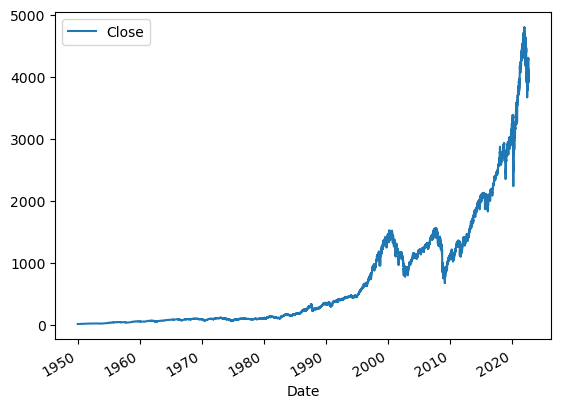

In [8]:
dataframe.plot.line(y = "Close", use_index = True)
#the index is the x_axis and the Close Stock is the y_axis

We then remove the columnls we will not be using i.e the (Dividends and the Stock Splits)

In [9]:
del dataframe["Dividends"]
del dataframe["Stock Splits"]

In [10]:
dataframe.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


### We then setup our target for the machine learning (i.e what we are predicting i.e if the stock prices will go up or down tomorrow)

In [11]:
dataframe["TomorrowStock"] = dataframe["Close"].shift(-1)

In [12]:
dataframe

,Open,High,Low,Close,Volume,TomorrowStock
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107


We created a new column for tomorrow's stock from the Closing Stock of the day by shifting the Closing stock back one day

In [13]:
dataframe["Target"] = (dataframe["TomorrowStock"] > dataframe["Close"]).astype(int)

In [14]:
dataframe

,Open,High,Low,Close,Volume,TomorrowStock,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


When price went up the target is 1 and 0 when price went down

Since there is alot of historical data. With stock market data if you use extremely old data it might not be suitable for making future predictions because the market may have shifted fundamentally. Hence I will remove the data before the year 1990.

In [15]:
# We will take data from 1990-present data hence ignoring data that came before 1990
dataframe = dataframe.loc["1990-01-01":].copy()

In [16]:
dataframe

,Open,High,Low,Close,Volume,TomorrowStock,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


### We now train an initial machine learning model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [19]:
train = dataframe.iloc[:-100]
test = dataframe.iloc[-100:]

#we place all of the data except the last 100 into training and the last 100 into testing
#we then create a list of the columns we use as predictors

predictors = ["Open", "High", "Low", "Close", "Volume"]

In [20]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
from sklearn.metrics import precision_score 

preds = model.predict(test[predictors])

In [22]:
preds = pd.Series(preds, index = test.index)

In [23]:
preds

Date
2022-04-20    1
2022-04-21    0
2022-04-22    0
2022-04-25    0
2022-04-26    1
             ..
2022-09-06    1
2022-09-07    1
2022-09-08    1
2022-09-09    1
2022-09-12    1
Length: 100, dtype: int32

In [24]:
precision_score(test["Target"], preds)

0.5189873417721519

Our preciion core is 51% meaning, when we said the stock will go up it ent up 51% of the time

We then plot the predictions by combining the actual values and our predicted values

In [25]:
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

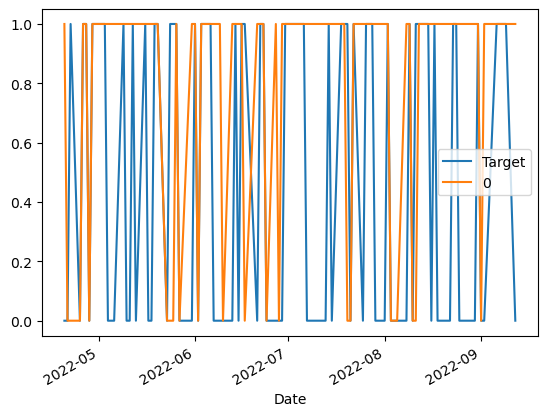

In [26]:
combined.plot()

### We then build a more robust way to test our algorithm. This is done by backtesting 

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [28]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start ,data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(dataframe, model, predictors)

In [30]:
predictions["Predictions"].value_counts()

0    3311
1    2427
Name: Predictions, dtype: int64

We can see that we predicted that the market would go down by about 3000 days and predicted that the market would go up by about 2000 days

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298722702925422

Now from accross all the rows we specified we are 52% accurate 

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.536075
0    0.463925
Name: Target, dtype: float64

In the above we look ata the percentage of days in which the market went up by looking at the value counts of the target divided by the number of rows( given by predictions.shape[0] ) to give us the percentages

The SP500 actually went up 53% of the time and down 46% of the time.This means our model is not that accurate as it stated that it would go up 51% of the time and after back testing it went up 52% of the time which means our model is not that good.
This means our algorithm performed worse than the actual progression of the market

### We will then add more predictors to try and improve the accuracy of our model

We create a variety of rollong averages. We will look at the mean closing price of the last two days(2 days), the last trading week(5 day), the last trading year(250 = 1 trading year) and the last four years(1000 = 250*4). After we will find the ratios between todays closing price and the closing price in those periods. This helps the algorithm make better predictions

In [33]:
horizons = [2 ,5, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = dataframe.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    dataframe[ratio_column] = dataframe["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    dataframe[trend_column] = dataframe.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [34]:
dataframe

,Open,High,Low,Close,Volume,TomorrowStock,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.919786,121.0,1.123489,543.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1,1.003294,2.0,1.012411,3.0,0.926253,122.0,1.130564,543.0


In [35]:
dataframe = dataframe.dropna()

In [36]:
dataframe

,Open,High,Low,Close,Volume,TomorrowStock,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3908.189941,0,0.994603,1.0,0.987838,1.0,0.905996,120.0,1.108446,543.0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.919786,121.0,1.123489,543.0


we can now improve our model by updating the model Slightly

In [37]:
model = RandomForestClassifier(n_estimators = 300, min_samples_split = 50, random_state = 1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [39]:
predictions = backtest(dataframe, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()

0.0    3959
1.0     778
Name: Predictions, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694087403598972

In the above when we buy a stock 56% of the time it will go up. One can make improvements to the model by adding more information